# Dataset

imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)


In [4]:
# b. Afficher les dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)

Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)


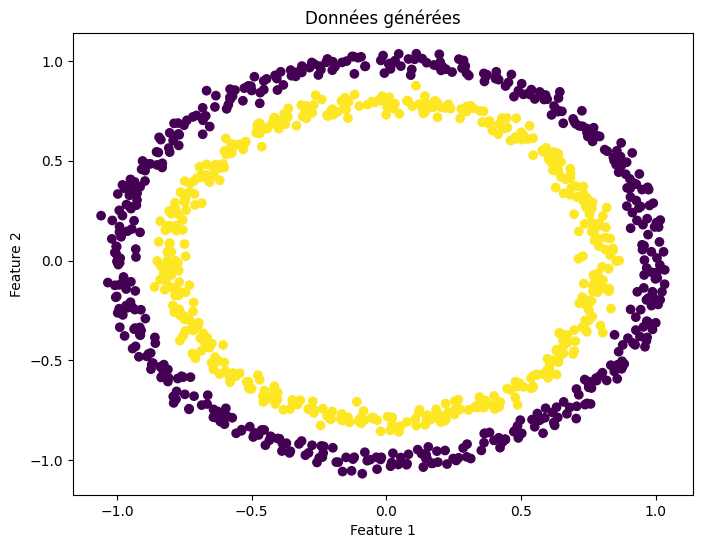

In [5]:
# c. Visualiser les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Données générées')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
# d. Ce dataset nécessite une fonction linéaire ou non linéaire pour séparer ses classes ?
# Visualisons les données pour le déterminer
# Comme les données sont générées en cercles, elles nécessitent une fonction non linéaire pour séparer les classes.

In [7]:
# e. Diviser les données en ensembles d’apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions de l'ensemble d'apprentissage (X_train) :", X_train.shape)
print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)
print("Dimensions de la sortie de l'ensemble d'apprentissage (y_train) :", y_train.shape)
print("Dimensions de la sortie de l'ensemble de test (y_test) :", y_test.shape)

Dimensions de l'ensemble d'apprentissage (X_train) : (800, 2)
Dimensions de l'ensemble de test (X_test) : (200, 2)
Dimensions de la sortie de l'ensemble d'apprentissage (y_train) : (800,)
Dimensions de la sortie de l'ensemble de test (y_test) : (200,)


## 2. Definition du modèle

In [8]:
# Créer un modèle Sequential
model = Sequential()

# Ajouter une couche entièrement connectée avec 100 neurones cachés
model.add(Dense(32, input_shape=(2,), activation='relu'))

model.add(Dense(64, input_shape=(2,), activation='relu'))

# Ajouter une activation sigmoïde
model.add(Dense(1, activation='sigmoid'))



In [9]:
# Résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from keras.optimizers import SGD

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [11]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
25/25 [==============================] - 1s 7ms/step - loss: 0.6917 - accuracy: 0.5013 - val_loss: 0.6930 - val_accuracy: 0.4850
Epoch 2/400
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.4988 - val_loss: 0.6927 - val_accuracy: 0.4850
Epoch 3/400
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5013 - val_loss: 0.6924 - val_accuracy: 0.4850
Epoch 4/400
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5038 - val_loss: 0.6921 - val_accuracy: 0.4800
Epoch 5/400
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5063 - val_loss: 0.6918 - val_accuracy: 0.4800
Epoch 6/400
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5050 - val_loss: 0.6914 - val_accuracy: 0.4850
Epoch 7/400
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5050 - val_loss: 0.6911 - val_accuracy: 0.4850
Epoch 8/400
2

In [12]:
for i in range(0, 400, 10):
    print(f"Epoch {i+1}/{300} - Loss: {history.history['loss'][i]:.4f} - Accuracy: {history.history['accuracy'][i]:.4f} - Test Loss: {history.history['val_loss'][i]:.4f} - Test Accuracy: {history.history['val_accuracy'][i]:.4f}")

Epoch 1/300 - Loss: 0.6917 - Accuracy: 0.5013 - Test Loss: 0.6930 - Test Accuracy: 0.4850
Epoch 11/300 - Loss: 0.6876 - Accuracy: 0.5250 - Test Loss: 0.6899 - Test Accuracy: 0.5100
Epoch 21/300 - Loss: 0.6835 - Accuracy: 0.5875 - Test Loss: 0.6867 - Test Accuracy: 0.5700
Epoch 31/300 - Loss: 0.6792 - Accuracy: 0.6538 - Test Loss: 0.6831 - Test Accuracy: 0.6000
Epoch 41/300 - Loss: 0.6742 - Accuracy: 0.6925 - Test Loss: 0.6790 - Test Accuracy: 0.6350
Epoch 51/300 - Loss: 0.6692 - Accuracy: 0.7088 - Test Loss: 0.6748 - Test Accuracy: 0.6550
Epoch 61/300 - Loss: 0.6638 - Accuracy: 0.7550 - Test Loss: 0.6702 - Test Accuracy: 0.6950
Epoch 71/300 - Loss: 0.6577 - Accuracy: 0.7887 - Test Loss: 0.6650 - Test Accuracy: 0.7250
Epoch 81/300 - Loss: 0.6504 - Accuracy: 0.8288 - Test Loss: 0.6589 - Test Accuracy: 0.7700
Epoch 91/300 - Loss: 0.6424 - Accuracy: 0.8462 - Test Loss: 0.6519 - Test Accuracy: 0.7900
Epoch 101/300 - Loss: 0.6334 - Accuracy: 0.8700 - Test Loss: 0.6438 - Test Accuracy: 0.8200

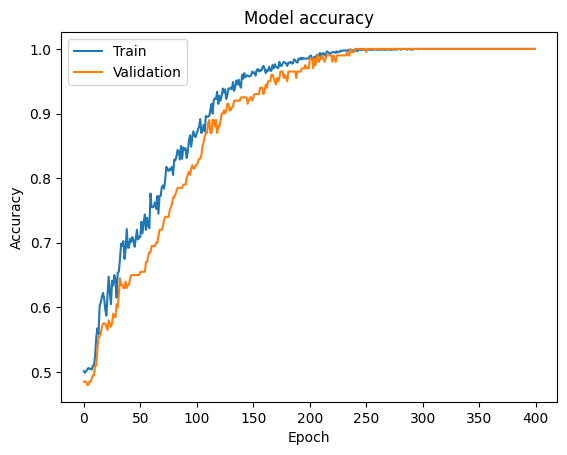

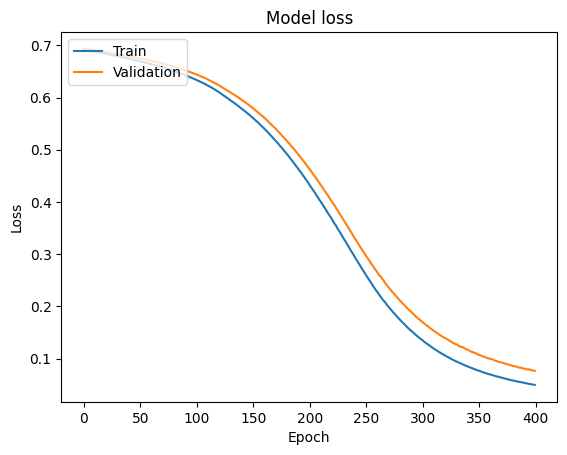

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


417/417 [==============================] - 0s 782us/step


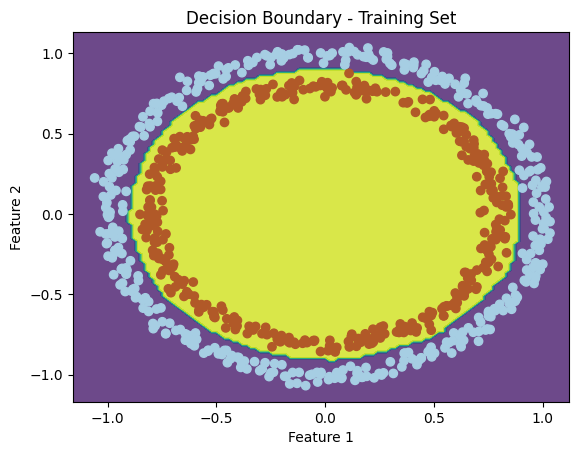

392/392 [==============================] - 0s 806us/step


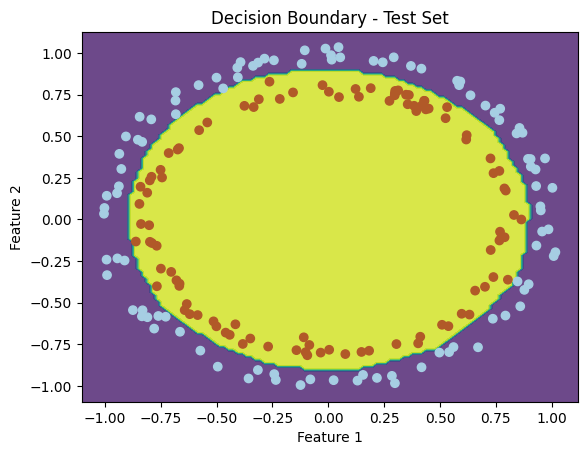

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Tracer la frontière de décision pour l'ensemble d'entraînement
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary - Training Set')

# Tracer la frontière de décision pour l'ensemble de test
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary - Test Set')


### La multi-Classification

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle

In [16]:
# 1. Créer des données multi-classes avec make-blobs()
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42,cluster_std=2)

In [17]:
# 2. Diviser les données en ensembles d’apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


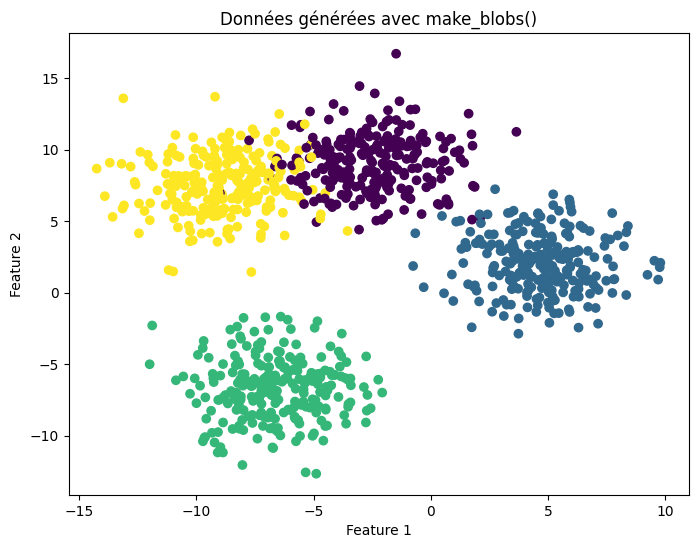

In [18]:
# 3. Visualiser les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Données générées avec make_blobs()')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [19]:
# 4. Ce dataset nécessite une fonction linéaire ou non linéaire pour séparer ses classes ?
# Comme les données sont générées avec make_blobs(), elles peuvent nécessiter à la fois des fonctions linéaires et non linéaires pour séparer les classes, en fonction de la distribution des données dans l'espace des features.

In [42]:
# 5. Proposer une architecture basée sur FCNN pour la classification de ces données et la développer
model = Sequential()
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(4, activation='softmax'))


In [43]:
# 6. Entraîner le modèle et afficher les mesures de progression toutes les 10 époques
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [22]:
# 7. Afficher toutes les métriques de classification vues en cours
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


7/7 [==============================] - 0s 2ms/step
Accuracy: 0.965
Precision: 0.9656586206896551
Recall: 0.965
F1 Score: 0.9651604633289417
Confusion Matrix:
 [[46  0  0  3]
 [ 2 39  0  0]
 [ 0  0 53  0]
 [ 2  0  0 55]]


63880/63880 [==============================] - 54s 852us/step


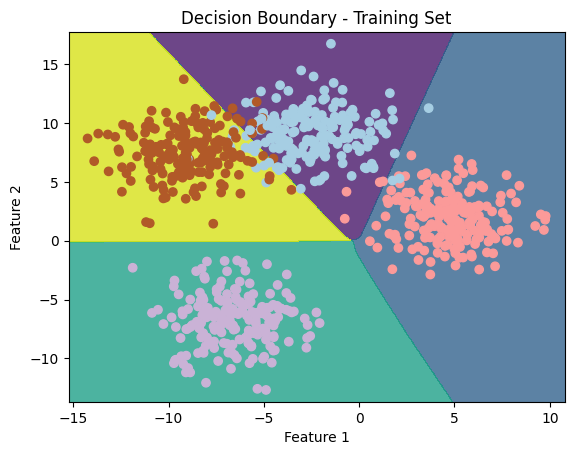

49410/49410 [==============================] - 43s 861us/step


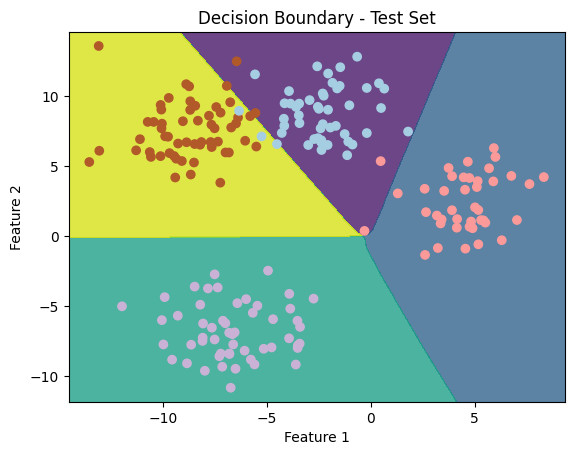

In [23]:
# 8. Tracer la (les) frontières(s) de décision pour les ensembles d’entraînement et de test
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Tracer la frontière de décision pour l'ensemble d'entraînement
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary - Training Set')

# Tracer la frontière de décision pour l'ensemble de test
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary - Test Set')


In [48]:
# 9. Etudier l’impact de l’augmentation du nombre d’échantillons dans le dataset sur l’exactitude de classification
# Définir une fonction pour entraîner le modèle et renvoyer l'exactitude
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    return test_accuracy,test_loss

# Définir différentes tailles de dataset
sample_sizes = [500,1000,5000,10000,50000,100000,1000000]

# Entraîner le modèle pour différentes tailles de dataset et enregistrer les exactitudes
accuracies = []
for size in sample_sizes:
    print(f"for size: {size}")
    X, y = make_blobs(n_samples=size, n_features=2, centers=4, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracy,error = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    accuracies.append(accuracy)



for size: 500
Epoch 1/100
13/13 [==============================] - 0s 6ms/step - loss: 1.9759e-05 - accuracy: 1.0000 - val_loss: 7.8131e-06 - val_accuracy: 1.0000
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 1.8709e-05 - accuracy: 1.0000 - val_loss: 7.2923e-06 - val_accuracy: 1.0000
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 1.7700e-05 - accuracy: 1.0000 - val_loss: 6.8787e-06 - val_accuracy: 1.0000
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 1.6889e-05 - accuracy: 1.0000 - val_loss: 6.4425e-06 - val_accuracy: 1.0000
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 1.6042e-05 - accuracy: 1.0000 - val_loss: 6.0623e-06 - val_accuracy: 1.0000
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 1.5426e-05 - accuracy: 1.0000 - val_loss: 5.6845e-06 - val_accuracy: 1.0000
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 1.4577e-05 - accura

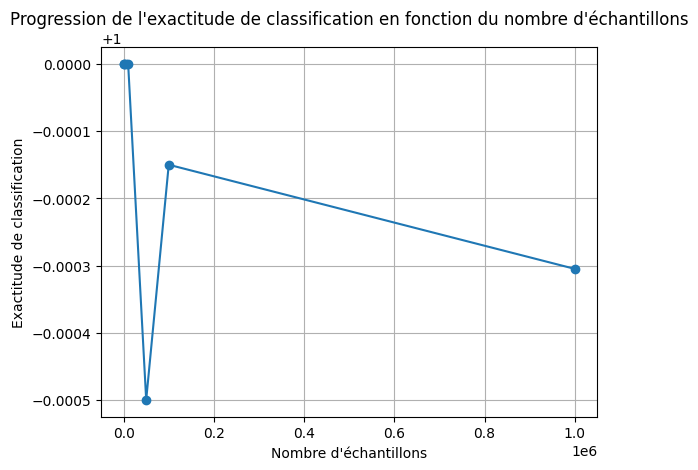

In [49]:
# Afficher la courbe de progression de l'exactitude de classification en fonction du nombre d'échantillons dans le dataset
plt.plot(sample_sizes, accuracies, marker='o')
plt.title('Progression de l\'exactitude de classification en fonction du nombre d\'échantillons')
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Exactitude de classification')
plt.grid(True)
plt.show()

on doit tester l'influence de :
- number of samples
- la variation de la variance des samples (noise)
on peut aussi a chaque fois on fait varier la variance , faire le plot de decision boundary and  